# PROBLEM STATEMENT

You are given a DataSet of Scores obtained by various students, wherein given the probability of being accepted for Graduate school. Using the regression model, create a predictor which gives probability of getting accepted in the graduate school.
    
**Model Used:** Multiple Regression

**Data Set:** https://drive.google.com/file/d/1i63HKAlxtpUF3-YRCYSLsAVo1teAdZZF/view?usp=sharing

- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

# STEP 01: IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 02: IMPORT DATASET

In [15]:
dataset = pd.read_csv('C:/Users/hp/Documents/GitHub/Machine-Learning--Projects-/1. Supervised Learning/1. Regression/Admission.csv')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [17]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [18]:
print(dataset.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Admission Chance  
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


# STEP #3: VISUALIZE DATASET

<AxesSubplot:>

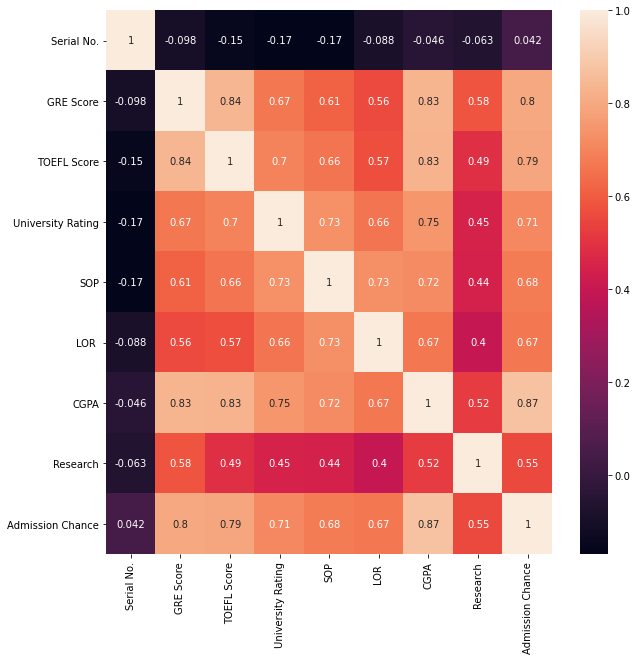

In [19]:
plt.figure(figsize = (10, 10))
sns.heatmap(dataset.corr(), annot = True)

In [ ]:
sns.pairplot

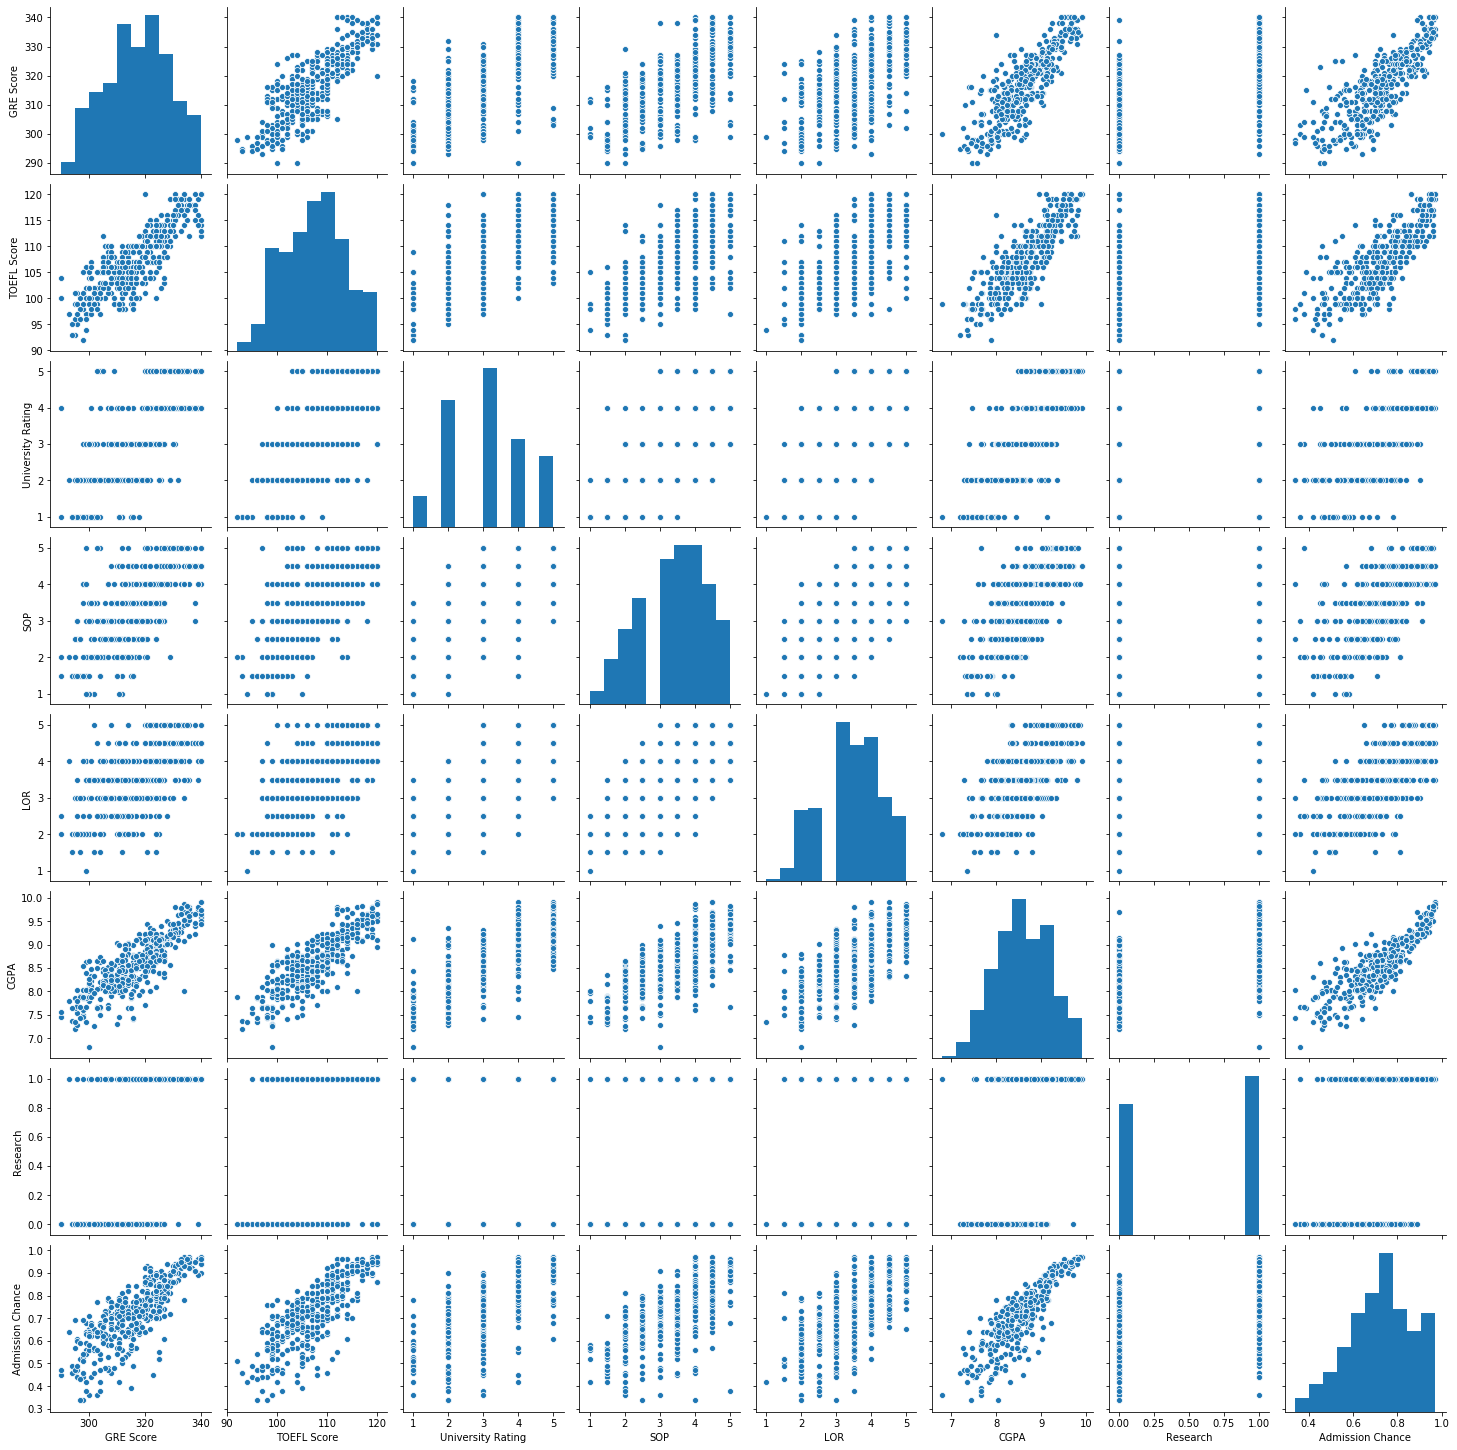

In [15]:
sns.pairplot(admission_df)

In [17]:
admission_df.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False


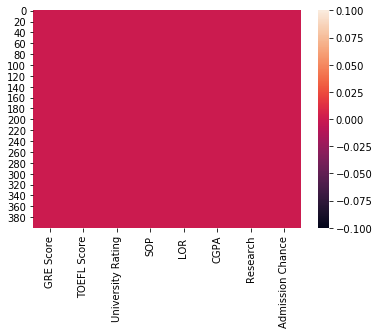

In [16]:
sns.heatmap(admission_df.isnull())

# STEP #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [18]:
X = admission_df.iloc[:, :-1].values

In [19]:
y = admission_df.iloc[:, -1].values

In [23]:
print(y)

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 0)

In [25]:
X_train.shape

(320, 7)

In [26]:
X_test.shape

(80, 7)

# STEP #5: TRAINING THE MODEL

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_predict = regressor.predict(X_test)

# STEP #6: EVALUATING THE MODEL 

Text(0.5, 0, 'True (ground truth)')

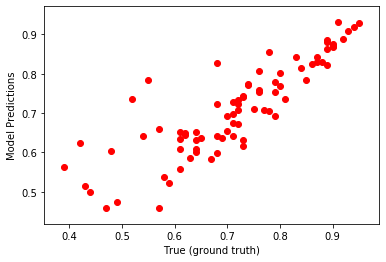

In [29]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [30]:
print(X_train.shape)

(320, 7)


# STEP #7: Eliminating Columns using Backward Elimination

In [31]:
import statsmodels.api as smf  
# add a column of ones as integer data type 
X_train = np.append(arr = np.ones((320,1)).astype(int), values=X_train, axis=1)    
# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 

regressor_OLS=smf.OLS(endog = y_train, exog=X_train).fit()  
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     199.5
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          3.68e-111
Time:                        18:12:43   Log-Likelihood:                 437.70
No. Observations:                 320   AIC:                            -859.4
Df Residuals:                     312   BIC:                            -829.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3047      0.136     -9.626      0.000      -1.571      -1.038
x1             0.0021      0.001      3.195      0.002       0.001       0.003
x2             0.0020      0.001      1.635      0.103      -0.000       0.004
x3             0.0066      0.005      1.231      0.219      -0.004       0.017
x4            -0.0047      0.006     -0.783      0.434      -0.017       0.007
x5             0.0212      0.006      3.381      0.001       0.009       0.034
x6             0.1246      0.014      9.088      0.000       0.098       0.152
x7             0.0241      0.009      2.772      0.006       0.007       0.041
==============================================================================
Omnibus:                       63.482   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.078
Skew:                          -1.034   Prob(JB):                     2.54e-28
Kurtosis:                       5.292   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
print(X_train)

[[  1.   319.   110.   ...   2.5    8.79   0.  ]
 [  1.   325.   111.   ...   3.5    8.7    0.  ]
 [  1.   320.   103.   ...   3.     7.7    0.  ]
 ...
 [  1.   290.   104.   ...   2.5    7.46   0.  ]
 [  1.   339.   119.   ...   4.     9.7    0.  ]
 [  1.   322.   110.   ...   5.     9.13   1.  ]]
